<a href="https://colab.research.google.com/github/edoardorossi1995/Tesi/blob/main/Tesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Drive Setting

In [67]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB == True:
  from google.colab import drive
  drive.mount('/content/gdrive')
  %cd /content/gdrive/MyDrive/Tesi
  #!ls

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Tesi


#Primo Test PCA

## Importo Dataset

In [ ]:
import pandas as pd

anagrafica = ['Anagrafica.csv']
dati = ['dati.csv']

df_anagrafica = pd.read_csv(anagrafica[0])
df_dati = pd.read_csv(dati[0])
df_dati.drop(['timestamp'], axis=1, inplace=True)
df_dati

In [ ]:
#check data type
var = df_dati.loc[2,'PW_REAT_F1_00']
var.dtype

dtype('float64')

## Preprocessing: normalizzazione e PCA

### Visualizzazione dei dati pre normalizzazione

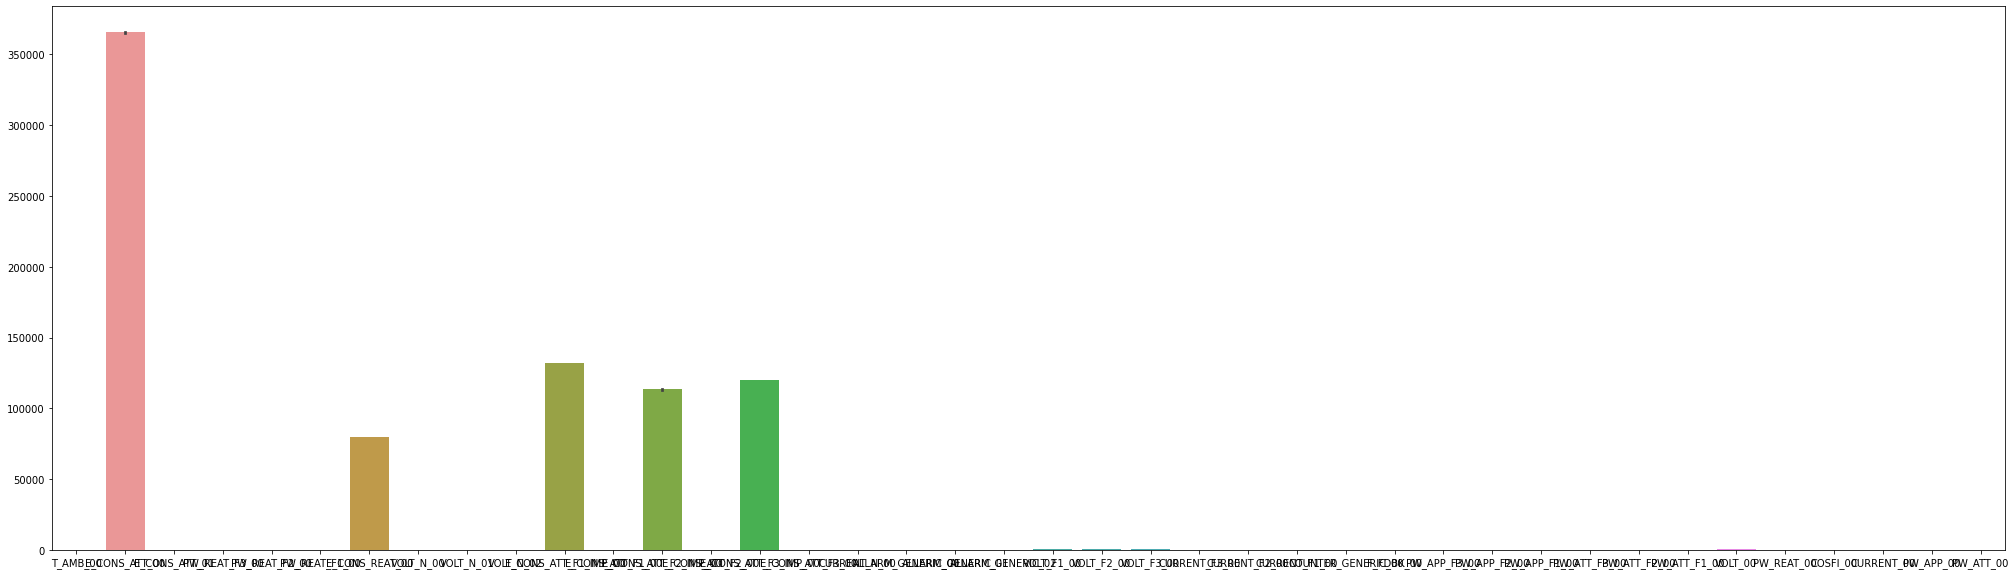

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(35,10))
sns.barplot(x=None, y=None, data=df_dati)

### Normalizzazione (MinMaxScaler)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_dati), columns=df_dati.columns)

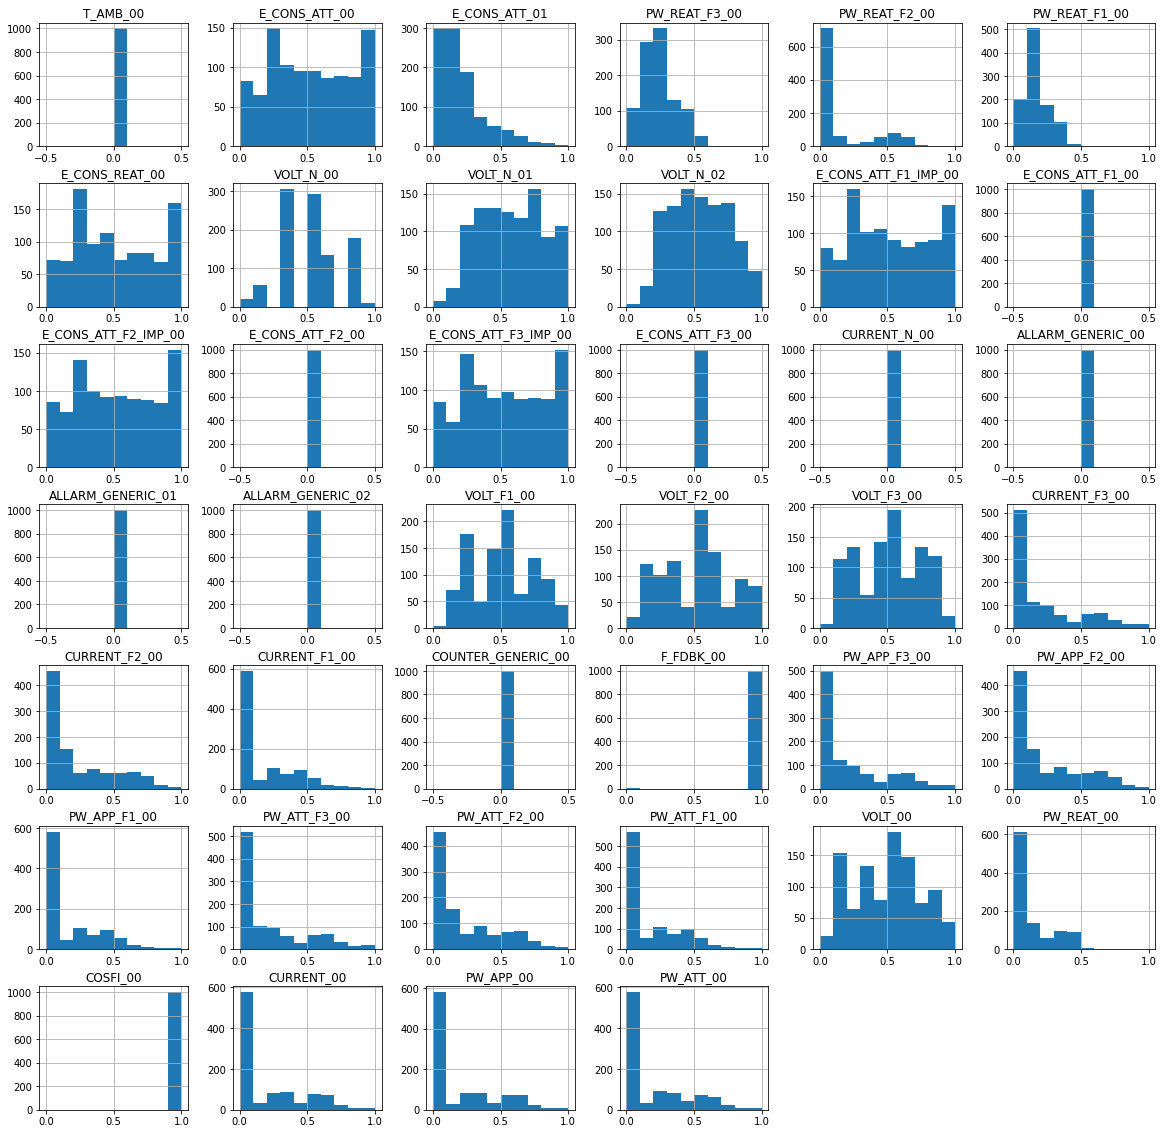

In [ ]:
Y = df_dati[['PW_ATT_F3_00','PW_ATT_F2_00','PW_ATT_F1_00','PW_ATT_00']]
df_norm.hist(figsize=(20,20))
plt.show()

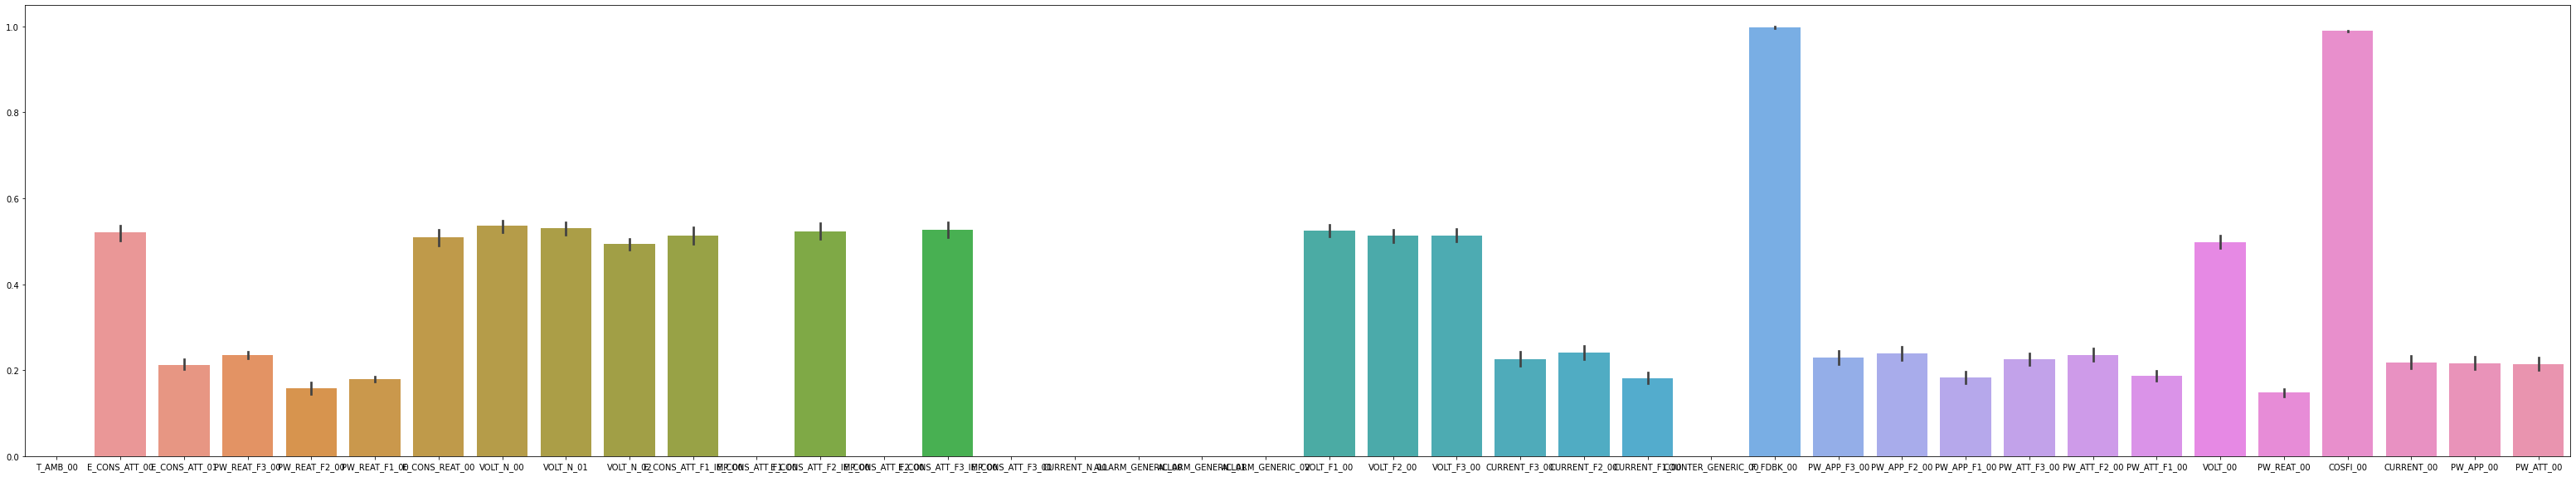

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(55,10))
sns.barplot(x=None, y=None, data=df_norm)


### Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
def pca(df, n_components):
    pca = PCA(n_components)
    principalComponents = pca.fit_transform(df)
    principalDf = pd.DataFrame(data = principalComponents)
    finalDf = principalDf
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
    print('Total explained variation: {}'.format(sum(pca.explained_variance_ratio_)))
    return finalDf
pca_df = pca(df_norm,3)
# 1: 0.55
# 2: 0.81
# 3: 0.96
# 4: 0.97
# 5: 0.98
# 6: 0.988
# 7: 0.99

Explained variation per principal component: [0.55180273 0.26715498 0.1450866 ]
Total explained variation: 0.9640443139414523


### Salvataggio del nuovo dataset

In [ ]:
pca_df.to_csv('raw_data.csv', index=False)
pca_df.to_excel('raw_data.xls', index=False)


## Impostazione problema 

In [ ]:
df_dati.shape

(1000, 40)

In [ ]:
pca_df.shape

(1000, 3)

Di conseguenza il mio stato è stato compresso in un vettore a 3 dimensioni (da 40) con perdita di infomazione inferiore al 4%.

Il problema verrà modellato nel seguente modo:
- I reward positivi saranno assegnati seguendo la minimizzazione delle potenze attive
- I reward negativi saranno assegnati sia basandosi sulla mancata minimizzazione delle potenze attive, sia su funzionamenti errati delle macchine.
- Lo stato, i reward e la scelta dell'azione individuerà una funzione valore (tramite rete neurale) sfruttando il framework "Average Return"

#Pseudocodice


S = random

A = random

**loop**:
* PCA(S)
* scelta A' | S,A
* S',R | S,A
* q stimata con rete neurale
* A' = argmin[A] (Somma_Potenze_ attive)
* A = A'
* S = S'




# Preprocessing Real Data

## Prima gestione dati: impostazione NaN

### Importo dataframe da .csv

In [ ]:
%cd /content/gdrive/MyDrive/Tesi/CTA30
!ls
import pandas as pd
import numpy as np


# per impostare il problema, considero solo i dati relativi al 2018
CTA30_2018 = ['CTA_30_2018.csv']
df_cta = pd.read_csv(CTA30_2018[0])
df_cta.drop(['timestamp'], axis=1, inplace=True)

[r,c] = df_cta.shape
types = df_cta.dtypes
if c - len(types) != 0:
  print("ERRORE: lunghezze non combaciano. c = ", c, ", len(types) = ", len(types), ",")

#df_cta = df_cta.dropna()
#print(df_cta.shape)


/content/gdrive/MyDrive/Tesi/CTA30
conv_CTA_30_2018.csv  CTA_30_2020.csv  CTA_30_def.csv	 raw_data_cta.xls
CTA_30_2018.csv       CTA_30_2021.csv  DF_NORM
CTA_30_2019.csv       CTA_30_2022.csv  raw_data_cta.csv


### Rimpiazzo: #00 => NaN

In [ ]:
# indicizzo le colonne di tipo object
ind = []
for i in range(len(types)):
  if types[i] == 'object':
    ind.append(i)

count = 0
for j in ind:
  count += 1
  print("j = ", j)
  for i in range(r):
    if df_cta.iloc[i,j] == '#00':
      df_cta.iloc[i,j] = np.nan
  

if count != len(ind):
  print("ERRORE: sono presenti types diversi da obj e float")

### Salvataggio nuovo .csv

In [ ]:
#df_cta.to_csv('conv_CTA_30_2018.csv', index=False)
#df_cta.to_excel('raw_data_cta.xls', index=False)

## Importo dataframe aggiornato

### Dataframes (pulizia)



#### Anagrafica

In [82]:
%cd /content/gdrive/MyDrive/Tesi/CTA30
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CTA30_def = ['/content/gdrive/MyDrive/Tesi/CTA30/CTA_30_def.csv']
df_def = pd.read_csv(CTA30_def[0])
df_def

/content/gdrive/MyDrive/Tesi/CTA30


,pointColName,pointName
0,VSD_M_DIAG_00,Inverter Mandata Diagnostico
1,VSD_R_DIAG_00,Inverter Ripresa Diagnostico
2,AUTOMAN_SERR_CMD_00,Automatico Manuale Serrande Comando
3,AUTOMAN_VLV_CMD_00,Automatico Manuale Valvole Comando
4,AUTOMAN_M_CMD_00,Automatico Manuale Mandata Comando
...,...,...
85,SWITCH_M_ST_00,Interruttore Mandata Stato
86,SWITCH_R_ST_00,Interruttore Ripresa Stato
87,AUTOMAN_ST_00,Automatico Manuale Stato
88,PRIORITY_00,Priorita


#### CTA_30

In [98]:
conv2018 = ['/content/gdrive/MyDrive/Tesi/CTA30/conv_CTA_30_2018.csv']
df = pd.read_csv(conv2018[0])
df


,ANTIGELO_ALARM_00,AUTOMAN_M_CMD_00,AUTOMAN_M_ST_00,AUTOMAN_R_CMD_00,AUTOMAN_R_ST_00,AUTOMAN_SERR_CMD_00,AUTOMAN_SERR_ST_00,AUTOMAN_ST_00,AUTOMAN_VLV_CMD_00,AUTOMAN_VLV_ST_00,...,VSD_M_RESET_CMD_00,VSD_R_RESET_CMD_00,VSD_M_DISPO_00,F_M_FDBK_01,F_R_FDBK_01,F_M_REG_00,F_R_REG_00,SWITCH_M_ST_00,SWITCH_R_ST_00,VSD_R_DIAG_00
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286054,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286055,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286056,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286057,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df.shape

(286059, 90)

#### Drop delle colonne nulle dal Dataframe

In [100]:
ret = df.isnull().sum()
np.argmax(ret)
column_names = list(df.columns.values)
full_nan_cols = []
[r,c] = df.shape

for i in range(len(ret)):
  if ret[i] == r:
    full_nan_cols.append(column_names[i])

df.drop(full_nan_cols, axis=1, inplace=True)
df

,ANTIGELO_ALARM_00,AUTOMAN_M_CMD_00,AUTOMAN_M_ST_00,AUTOMAN_R_CMD_00,AUTOMAN_R_ST_00,AUTOMAN_SERR_CMD_00,AUTOMAN_SERR_ST_00,AUTOMAN_ST_00,AUTOMAN_VLV_CMD_00,AUTOMAN_VLV_ST_00,...,VLV_RAF_REG_00,VLV_SUR_CLOSED_00,VLV_SUR_DIAG_00,VLV_SUR_FDBK_00,VLV_SUR_REG_00,FILTER_ALRM_01,FILTER_ALRM_00,FILTER_ALRM_02,METER_M_DIAG_00,METER_R_DIAG_00
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,...,212.0,1.0,NaN,0.0,NaN,NaN,NaN,0.0,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,...,212.0,1.0,NaN,0.0,NaN,NaN,NaN,0.0,1.0,NaN
3,0.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN,1.0,1.0,...,212.0,1.0,NaN,0.0,NaN,NaN,NaN,0.0,1.0,NaN
4,0.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN,1.0,1.0,...,212.0,1.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286054,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286055,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286056,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286057,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Drop delle righe nulle dal Dataframe Anagrafica

In [101]:
print("full_nan_cols :", full_nan_cols)
index_drop_df = []
for i in range(c):
  for j in range(len(full_nan_cols)):
    if df_def.iloc[i,0] == full_nan_cols[j]:
      index_drop_df.append(i)


df_def = df_def.drop(index_drop_df)  


full_nan_cols : ['T_AMB_SP_00', 'PRIORITY_00', 'VSD_M_DIAG_00', 'VSD_R_DISPO_00', 'VSD_M_RESET_CMD_00', 'VSD_R_RESET_CMD_00', 'VSD_M_DISPO_00', 'F_M_FDBK_01', 'F_R_FDBK_01', 'F_M_REG_00', 'F_R_REG_00', 'SWITCH_M_ST_00', 'SWITCH_R_ST_00', 'VSD_R_DIAG_00']


In [102]:
print(df_def.shape) 

(76, 2)


#### Drop Nan dal Dataframe

In [103]:
df = df.dropna()
print(df.shape)

(141811, 76)


### Salvataggio df pre-compressione CTA e salvataggio Anagrafica

La fase di compressione (normalizzazione + pca) non verrà salvata sul df attuale, dal momento che sarà necessaria unicamente per la stima della funzione valore tramite approssimatore funzionale. Nel funzionamento dell'algoritmo invece, il dataframe dovrà essere osservabile senza modifiche hai dati.

In [104]:
%cd /content/gdrive/MyDrive/Tesi/CTA30/DF_clean
df.to_csv('clean_CTA_30_2018.csv', index=False)
df_def.to_csv('clean_CTA_30_def.csv', index=False)

/content/gdrive/MyDrive/Tesi/CTA30/DF_clean


## Normalizzazione e PCA setting

I seguenti blocchi hanno come scopo il determinare il minor numero di dimensioni su cui proiettare il dataframe preservando la varianza desiderata. 

I passaggi di *compressione* sono:
- normalizazione
- pca

Il parametro **'n_components'** verrà salvato sul file   '**.pkl*'   in un dizionario, per poi essere importato da una funzione che eseguirà, al momento opportuno (e in un altro notebook), i passaggi per la compressione sopracitata.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#### Istogrammi

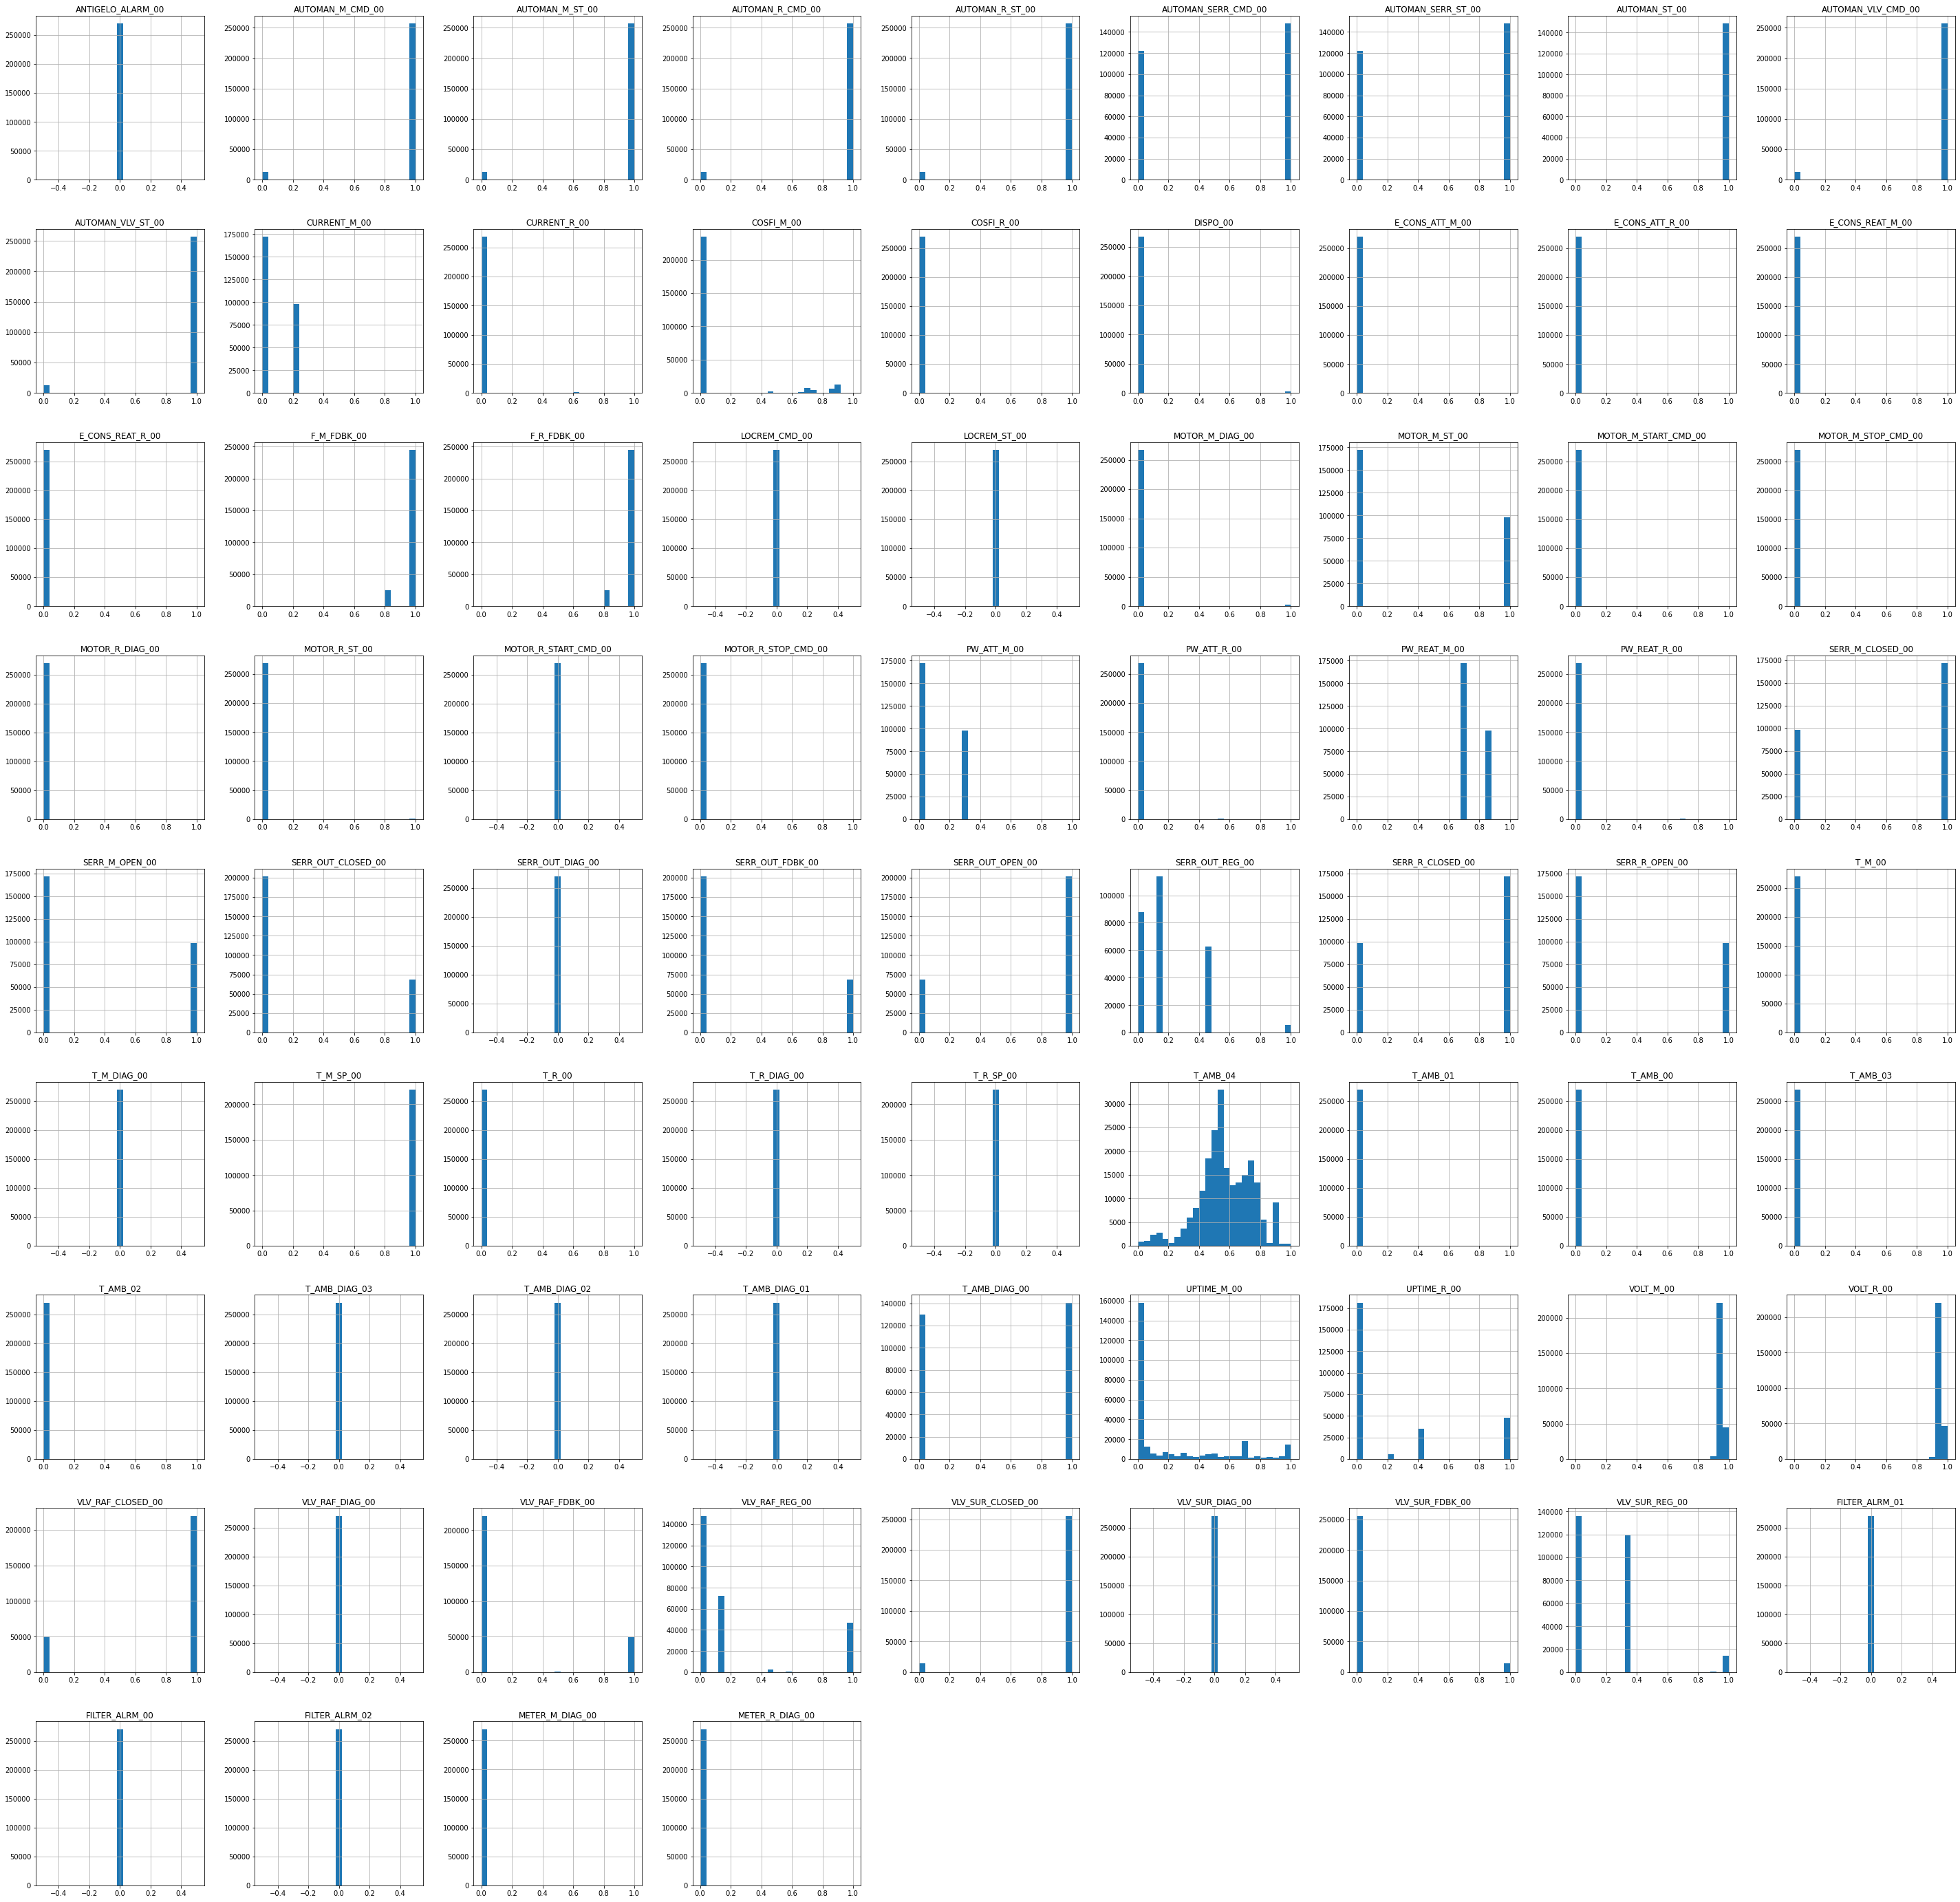

In [ ]:
df_norm.hist(figsize=(50,50),bins = 25)
plt.show()


###PCA

In [ ]:
from sklearn.decomposition import PCA

# la seguente funzione mi restituisce il numero di componenti minimo per
# preservare la varianza minima (in percentuale) indicata dal parametro treshold

def pca_treshold(df,treshold):
  evr = 0
  great_n = 0
  while evr < treshold:
    great_n += 1
    pca = PCA(great_n)
    principalComponents = pca.fit_transform(df)
    principalDf = pd.DataFrame(data = principalComponents)
    finalDf = principalDf
    evr = sum(pca.explained_variance_ratio_)
  print('Total explained variation: {}'.format(sum(pca.explained_variance_ratio_)))
  print("Number of components: ",great_n)
  return great_n

n_components = pca_treshold(df_norm,0.97)

# questa funzione serve solo per questo studio specifico. infatti dovendo 
# applicare pca in un algoritmo più complesso, la sua esecuzione è necessaria 
# solo in questa situazione, così da avere il parametro great_n in memoria


Total explained variation: 0.9762448155752349
Number of components:  8


#### Save n_components

In [ ]:
%cd /content/gdrive/MyDrive/Tesi

import pickle
import sys
sys.path.insert(0, '/content/gdrive/MyDrive/Tesi/functions')
from pkl import store_data, load_data, hello

data = {'n_components' : n_components}
store_data(data, '*.pkl')


/content/gdrive/MyDrive/Tesi
